In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle


In [4]:
#utils

def carregar_pickle(nome_arquivo):
  with open(nome_arquivo, 'rb') as arquivo:
    objeto = pickle.load(arquivo)
  return objeto

#### carregando h3 w3_s1

In [4]:
raw_data_set1 = carregar_pickle('dataset_H3_W3S1.pkl')
input_full1 = raw_data_set1['inputs']
output_full1 = raw_data_set1['outputs']
sequences_full1 = raw_data_set1['sequences']

#### carregando h3 w12_s4

In [5]:
raw_data_set2 = carregar_pickle('dataset_H3_W12S4.pkl')
input_full2 = raw_data_set2['inputs']
output_full2 = raw_data_set2['outputs']
sequences_full2 = raw_data_set2['sequences']

#### carregando multiplas representações

In [5]:
raw_data_setR0 = carregar_pickle('dataset_H3_W3S1.pkl')
input_fullR0 = raw_data_setR0['inputs']
output_fullR0 = raw_data_setR0['outputs']
sequences_fullR0 = raw_data_setR0['sequences']

raw_data_setR1 = carregar_pickle('dataset_H3_W4S2.pkl')
input_fullR1 = raw_data_setR1['inputs']
output_fullR1 = raw_data_setR1['outputs']
sequences_fullR1 = raw_data_setR1['sequences']

In [7]:
validaSequencesOrder(sequences_fullR0, sequences_fullR1)

n of difs: 0
Ordem OK


In [8]:
input_fullR0.shape

(14963, 497, 16)

#### criando datasets w3_s1

In [22]:
input_train1, input_test1, output_train1, output_test1, sequence_train1, sequence_test1 = train_test_split(input_full1, output_full1, 
sequences_full1, train_size=0.75 , shuffle= True, random_state = 0);

NameError: name 'input_full1' is not defined

#### criando datasets w12_s4

In [10]:
input_train2, input_test2, output_train2, output_test2, sequence_train2, sequence_test2 = train_test_split(input_full2, output_full2, 
sequences_full2, train_size=0.75 , shuffle= True, random_state = 0);

#### criando dataset conjunto

In [93]:
input_trainR0, input_testR0, input_trainR1, input_testR1, output_trainConj, output_testConj, sequence_trainConj, sequence_testConj = train_test_split(input_fullR0, input_fullR1, output_fullR0, 
sequences_fullR0, train_size=0.75 , shuffle= True, random_state = 0);

In [10]:
input_trainR1.shape

(11222, 122, 52)

In [7]:
#utils

# binariza resultado da classificação da RN. 
#param: array -> Rn output, corte -> x > corte significa 1
def myClassify(array, corte):
    classifiedArray = []
    for x in array:
        if(x > corte):
            classifiedArray.append(1)
        else:
            classifiedArray.append(0)
    
    return classifiedArray

# Retorna lista com Ok/Nok para predição binarizada  e valor real
# param: arrPredict -> predict da rede
# param: arrReal -> valores reais de referência
def comparePredictOkNok(arrPredict, arrReal):

    sizePredict = len(arrPredict)
    sizeArrReal = len(arrReal)

    if(sizePredict != sizeArrReal):
        print('tamanho dos arrays é imcompatível')
        return

    size = sizeArrReal

    arrOkNok = []
    for i in range(0, size):
        if(arrPredict[i] == arrReal[i]):
            arrOkNok.append('OK')
        else:
            arrOkNok.append('NOK')
    
    return arrOkNok



# Retorna lista com Ok/Nok para predição binarizada  e valor real
# param: arrPredict -> predict da rede
# param: arrReal -> valores reais de referência
# param: sequenceTest -> sequencia correspondente
def comparePredictOkNokWithSeq(arrPredict, arrReal, sequenceTest):

    sizePredict = len(arrPredict)
    sizeArrReal = len(arrReal)

    if(sizePredict != sizeArrReal):
        print('tamanho dos arrays é imcompatível')
        return

    size = sizeArrReal

    arrOkNok = []
    for i in range(0, size):
        if(arrPredict[i] == arrReal[i]):
            arrOkNok.append('OK' + ' : ' + sequenceTest[i])
        else:
            arrOkNok.append('NOK' + ' : ' + sequenceTest[i])
    
    return arrOkNok
        


In [1]:
def verifyIfSeqWindowAndStrideMatches(seqSize, windowSize, strideSize):
    last_window_start = 0
    nOfStrides = 0
    while (last_window_start + windowSize - 1) < (seqSize - 1):
        last_window_start = strideSize * nOfStrides
        nOfStrides = nOfStrides + 1
        #print(last_window_start)
        #print(nOfStrides)
        #print(' ')

    print('n of windows: ' + str(nOfStrides))
    print('last window start: ' + str(last_window_start))
    print('last window end: ' + str(last_window_start + windowSize - 1))
    print('max seq position: ' + str(seqSize - 1))



def validaSequencesOrder(seq0, seq1):
    i = 0
    d = 0
    while i < len(seq0):
        #print(seq0[i][0:15] + ' - ' + seq1[i][0:15])
        if(seq0[i] != seq1[i]):
            d = d+1
        i = i + 1

    if d > 0:
        print('n of difs: ' + str(d))
        print('Ordem NOK')
    else:
        print('n of difs: ' + str(d))
        print('Ordem OK')



In [4]:
verifyIfSeqWindowAndStrideMatches(163,37,21)   # 38,8,5 -> 7    #163, 37, 21 => 7

n of windows: 7
last window start: 126
last window end: 162
max seq position: 162


In [16]:
input_train1[0].shape

(497, 16)

#### implementação funcional paralela

In [94]:
inputR0 = keras.Input(shape=(497, 16)) 
conv1R0 = keras.layers.Conv1D(10, kernel_size= 1, strides= 1, padding='valid', activation='relu', input_shape = (497, 16), use_bias= True)(inputR0)
pool1R0 = keras.layers.AveragePooling1D(pool_size=11, strides= 3, padding='valid')(conv1R0)
conv2R0 = keras.layers.Conv1D(35, kernel_size= 1, strides= 1, padding='valid', activation='relu', input_shape = (163, 10), use_bias= True)(pool1R0)
pool2R0 = keras.layers.AveragePooling1D(pool_size=37, strides= 21, padding='valid')(conv2R0)
#flatR0 = keras.layers.Flatten()(pool2R0)

inputR1 = keras.Input(shape=(248, 18)) 
conv1R1 = keras.layers.Conv1D(5, kernel_size= 1, strides= 1, padding='valid', activation='relu', input_shape = (248, 18), use_bias= True)(inputR1)
pool1R1 = keras.layers.AveragePooling1D(pool_size=11, strides= 3, padding='valid')(conv1R1)
conv2R1 = keras.layers.Conv1D(10, kernel_size= 1, strides= 1, padding='valid', activation='relu', input_shape = (80, 10), use_bias= True)(pool1R1)
pool2R1 = keras.layers.AveragePooling1D(pool_size=20, strides= 10, padding='valid')(conv2R1)
#flatR1 =  keras.layers.Flatten()(pool2R1)

concatenate_filters = keras.layers.concatenate([pool2R0, pool2R1])

convOut = keras.layers.Conv1D(60, kernel_size= 1, strides= 1, 
                              padding='valid', activation='relu', use_bias= True)(concatenate_filters)

poolOut = keras.layers.GlobalAveragePooling1D()(convOut)

flatOut =  keras.layers.Flatten()(poolOut)

dense1 = keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.3))(flatOut)  #keras.layers.LeakyReLU(alpha=0.3)
dense2 = keras.layers.Dense(10, activation=keras.layers.LeakyReLU(alpha=0.3))(dense1)
#dense3 = keras.layers.Dense(10, activation=keras.layers.LeakyReLU(alpha=0.3))(dense2)
outpu1 = keras.layers.Dense(1, activation='sigmoid')(dense2)

model = keras.Model(inputs= [inputR0, inputR1], outputs=outpu1)




# CNN = keras.Sequential()

# CNN.add(keras.layers.Conv1D(10, kernel_size= 1, strides= 1, padding='valid', activation='relu', input_shape = (122, 52), use_bias= True))    #activation='relu'
# CNN.add(keras.layers.AveragePooling1D(pool_size=11, strides= 3, padding='valid'))

# CNN.add(keras.layers.Conv1D(35, kernel_size= 1, strides= 1, padding='valid', 
#                             activation='relu', input_shape = (38, 10), use_bias= True))
# #CNN.add(keras.layers.AveragePooling1D(pool_size=8, strides= 5, padding='valid'))
# CNN.add(keras.layers.GlobalAveragePooling1D())


In [86]:
model.summary();
#keras.utils.plot_model(model);

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 497, 16)]    0           []                               
                                                                                                  
 input_40 (InputLayer)          [(None, 248, 18)]    0           []                               
                                                                                                  
 conv1d_95 (Conv1D)             (None, 497, 10)      170         ['input_39[0][0]']               
                                                                                                  
 conv1d_97 (Conv1D)             (None, 248, 10)      190         ['input_40[0][0]']               
                                                                                           

#### implemetação paralela

In [96]:
model.compile(loss=keras.losses.BinaryCrossentropy(reduction='sum_over_batch_size'), metrics=['accuracy']
            , optimizer= keras.optimizers.Adam(learning_rate=0.001))   #sum_over_batch_size

In [97]:

callback = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

historyf = model.fit([input_trainR0, input_trainR1], output_trainConj, epochs= 200, batch_size = 32, 
                     validation_split = 0.4, shuffle= True, callbacks=[callback]) # validation_split = 0.33

Epoch 1/200
211/211 [==============================] - 26s 112ms/step - loss: 0.6224 - accuracy: 0.6522 - val_loss: 0.4876 - val_accuracy: 0.7752
Epoch 2/200
211/211 [==============================] - 24s 112ms/step - loss: 0.4752 - accuracy: 0.7808 - val_loss: 0.4803 - val_accuracy: 0.7812
Epoch 3/200
211/211 [==============================] - 24s 112ms/step - loss: 0.4649 - accuracy: 0.7878 - val_loss: 0.4563 - val_accuracy: 0.7873
Epoch 4/200
211/211 [==============================] - 23s 109ms/step - loss: 0.4524 - accuracy: 0.7933 - val_loss: 0.4679 - val_accuracy: 0.7855
Epoch 5/200
211/211 [==============================] - 23s 107ms/step - loss: 0.4490 - accuracy: 0.7947 - val_loss: 0.4442 - val_accuracy: 0.7982
Epoch 6/200
211/211 [==============================] - 23s 110ms/step - loss: 0.4478 - accuracy: 0.7919 - val_loss: 0.4481 - val_accuracy: 0.8000
Epoch 7/200
211/211 [==============================] - 24s 114ms/step - loss: 0.4379 - accuracy: 0.8026 - val_loss: 0.4393 -

In [24]:
modelBest = keras.models.load_model('best_model_10050525.h5')



In [23]:
#model.evaluate([input_testR0, input_testR1], output_testConj, batch_size= 32)
#modelBest.evaluate([input_testR0, input_testR1], output_testConj, batch_size= 32)

117/117 [==============================] - 1s 7ms/step - loss: 0.3812 - accuracy: 0.8460


[0.3812302052974701, 0.8460304737091064]

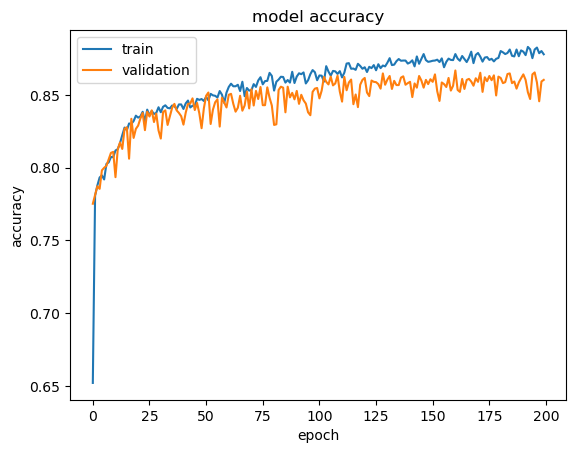

In [98]:

plt.plot(historyf.history['accuracy'])
plt.plot(historyf.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [99]:
print('max val_accuracy :' + str(max(historyf.history['val_accuracy'])) + '; ' + 'min val_loss : ' + str(min(historyf.history['val_loss'])) )

max val_accuracy :0.86678546667099; min val_loss : 0.3135331869125366


In [18]:
historyf.history['val_accuracy']

[0.7476052641868591,
 0.7576297521591187,
 0.7885943651199341,
 0.7794609069824219,
 0.7190911173820496,
 0.7894853949546814,
 0.7972822189331055,
 0.7687680721282959,
 0.8019603490829468,
 0.7714412808418274,
 0.8108710050582886,
 0.8124303817749023,
 0.8182223439216614,
 0.8115392923355103,
 0.8191133737564087,
 0.8200044631958008,
 0.8099799752235413,
 0.8251280784606934,
 0.8157718777656555,
 0.7848073244094849,
 0.8010692596435547,
 0.8298062086105347,
 0.8278012871742249,
 0.8226776719093323,
 0.8351525664329529,
 0.8135442137718201,
 0.8298062086105347,
 0.8269101977348328,
 0.8246825337409973,
 0.8322566151618958,
 0.8295834064483643,
 0.8231232166290283,
 0.8298062086105347,
 0.8302517533302307,
 0.8367119431495667,
 0.8197816610336304,
 0.8175539970397949,
 0.8231232166290283,
 0.8315883278846741,
 0.8102027177810669,
 0.824237048625946,
 0.8313655853271484,
 0.8322566151618958,
 0.8304744958877563,
 0.8135442137718201,
 0.8398306965827942,
 0.8088661432266235,
 0.83270215988

In [52]:
predictOnTest = model.predict([input_testR0, input_testR1])
predictOnTest

117/117 [==============================] - 3s 6ms/step


array([[0.20535856],
       [0.9682729 ],
       [0.58951306],
       ...,
       [0.20562437],
       [0.87147534],
       [0.96062887]], dtype=float32)

In [262]:
output_test1

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0])

In [263]:
classifiedArrayPredict = myClassify(predictOnTest, 0.5)
np.array(classifiedArrayPredict)

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0])

In [264]:

comparePredictOkNokWithSeq(classifiedArrayPredict, output_test, sequence_test)

['OK : agagggtgtactccaagaagaggaagatgaggctagacgtctctgcatggagtatga',
 'OK : gcaaaaataaatgcttgactctgtagcgggaaggcgtattatgcacaccccgcgccg',
 'OK : ttcgtctccgcgactacgatgagatgcctgagtgcttccgttactggattgtcacca',
 'OK : gtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg',
 'OK : aaattaaaattttattgacttaggtcactaaatactttaaccaatataggcatagcg',
 'OK : tatgaccgaacgagtcaatcagaccgctttgactctggtattactgtgaacattatt',
 'OK : taacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact',
 'OK : tttctacaaaacacttgatactgtatgagcatacagtataattgcttcaacagaaca',
 'OK : atgcatttttccgcttgtcttcctgagccgactccctataatgcgcctccatcgaca',
 'OK : tattggcttgctcaagcatgaactcaaggctgatacggcgagacttgcgagccttgt',
 'OK : aacgagtcaatcagaccgctttgactctggtattactgtgaacattattcgtctccg',
 'OK : tctgaaatgagctgttgacaattaatcatcgaactagttaactagtacgcaagttca',
 'OK : cactaatttattccatgtcacacttttcgcatctttgttatgctatggttatttcat',
 'OK : gaggtggctatgtgtatgaccgaacgagtcaatcagaccgctttgactctggtatta',
 'OK : catgtcagcctcgacaacttgcataaatgctttcttgtagacgtgccctacgcgc

In [94]:
model.layers[0].get_weights()[0][0]

array([[ 0.23533559,  0.42990232, -0.25082487, -0.15267515,  0.26705414,
         0.41497964,  0.27988416,  0.37338895, -0.29958403, -0.04501176],
       [ 0.42684212,  0.07528386,  0.28260273, -0.10901958, -0.15239488,
         0.44041243,  0.01431945,  0.2730652 ,  0.4608476 ,  0.46495697],
       [ 0.45438316,  0.02100177,  0.29724106, -0.24716143, -0.4676595 ,
         0.4724816 , -0.3817394 ,  0.19320472,  0.42271256, -0.05679994],
       [ 0.15253878, -0.10971248, -0.04070297, -0.21874414, -0.08176634,
         0.28545243, -0.43704703,  0.18602677,  0.22525644,  0.47238237],
       [-0.46574974, -0.4418646 , -0.38255867, -0.34078255, -0.23755996,
         0.2713209 ,  0.27443305, -0.03233695,  0.24816659, -0.28621373],
       [ 0.07085161,  0.39532802, -0.03007789, -0.32714292,  0.49284223,
         0.18271512, -0.03359003, -0.21458982, -0.42486927,  0.06511235],
       [ 0.2713358 , -0.27115414,  0.34532204, -0.23495436, -0.43641958,
        -0.3368862 ,  0.12960823,  0.10995054